In [1]:
import matplotlib.pyplot as plt
import numpy as np

**Time** - latency vs. throughput

**Energy** - energy consumption vs. energy efficiency

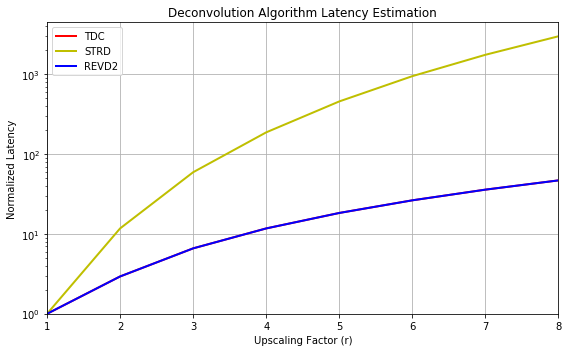

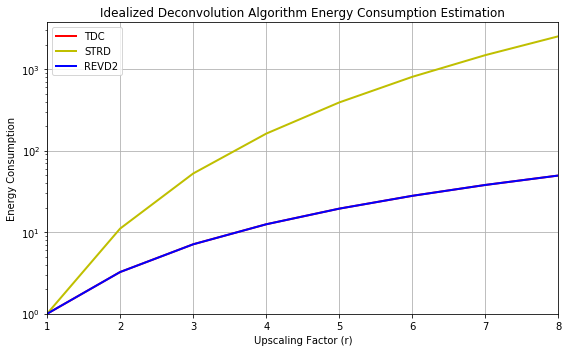

In [30]:
from upsampling.data_reuse import *

height = width = 1024
num_channels = 3
kernel_size = 3

# Using NVIDIA GTX 680 from Choi et al. (2013) - A Roofline Model of Energy
e_flop = 43.2  * 1e-12 # J / flop
e_mem = 437.5 * 1e-12 # J / byte
pi_0 = 66.37 # watts

t_flop = 1. / (1e9 * 3532.8) # s / flop
t_mem = 1. / (1e9 * 192.2) # s / byte

latency_measurements = np.zeros((3, 9)) # microseconds
energy_consumption = np.zeros((3, 9)) # millijoules

for upscaling_factor in np.arange(1, 9):
    macs, weights, activations = reverse_looping_deconvolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size
    )
    T = max(macs * t_flop, (weights + activations) * t_mem)
    E = macs * e_flop + (weights + activations) * e_mem + pi_0 * T
    latency_measurements[0, upscaling_factor] = 1e6 * T # microseconds
    energy_consumption[0, upscaling_factor] = 1e3 * E # millijoules
    
    macs, weights, activations = fractionally_strided_deconvolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size
    )
    T = max(macs * t_flop, (weights + activations) * t_mem)
    E = macs * e_flop + (weights + activations) * e_mem + pi_0 * T
    latency_measurements[1, upscaling_factor] = 1e6 * T # microseconds
    energy_consumption[1, upscaling_factor] = 1e3 * E # millijoules

    macs, weights, activations = transforming_deconvolution_to_convolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size
    )
    T = max(macs * t_flop, (weights + activations) * t_mem)
    E = macs * e_flop + (weights + activations) * e_mem + pi_0 * T
    latency_measurements[2, upscaling_factor] = 1e6 * T # microseconds
    energy_consumption[2, upscaling_factor] = 1e3 * E # millijoules

x  = np.arange(1, 9)
Tb = latency_measurements[0,1]
Eb = energy_consumption[0,1]
    
plt.figure(figsize=(8,5))
plt.plot(x, latency_measurements[2, 1:] / Tb, label="TDC", color="r", linewidth=2)
plt.plot(x, latency_measurements[1, 1:] / Tb, label="STRD", color="y", linewidth=2)
plt.plot(x, latency_measurements[0, 1:] / Tb, label="REVD2", color="b", linewidth=2)
plt.legend(loc="best")
plt.yscale("log")
plt.ylim(1,)
plt.xlim(1,8)
plt.grid()
plt.xlabel("Upscaling Factor (r)")
plt.ylabel("Normalized Latency")
plt.title("Deconvolution Algorithm Latency Estimation")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(x, energy_consumption[2, 1:] / Eb, label="TDC", color="r", linewidth=2)
plt.plot(x, energy_consumption[1, 1:] / Eb, label="STRD", color="y", linewidth=2)
plt.plot(x, energy_consumption[0, 1:] / Eb, label="REVD2", color="b", linewidth=2)
plt.legend(loc="best")
plt.yscale("log")
plt.ylim(1,)
plt.xlim(1,8)
plt.grid()
plt.xlabel("Upscaling Factor (r)")
plt.ylabel("Energy Consumption")
plt.title("Idealized Deconvolution Algorithm Energy Consumption Estimation")
plt.tight_layout()
plt.show()

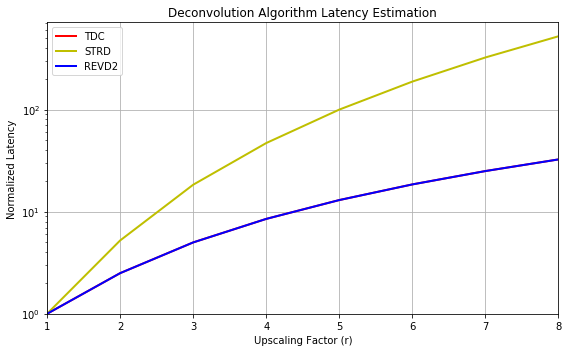

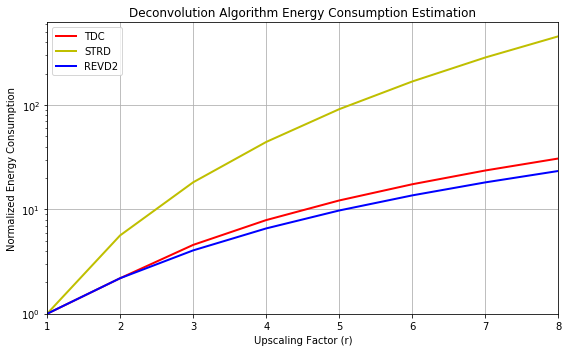

In [31]:
from upsampling.data_reuse import *

height = width = 1024
num_channels = 3
kernel_size = 3

# Using NVIDIA GTX 680 from Choi et al. (2013) - A Roofline Model of Energy
e_flop = 43.2  * 1e-12 # J / flop
e_mem = 437.5 * 1e-12 # J / byte
pi_0 = 66.37 # watts

t_flop = 1. / (1e9 * 3532.8) # s / flop
t_mem = 1. / (1e9 * 192.2) # s / byte

latency_measurements = np.zeros((3, 9)) # microseconds
energy_consumption = np.zeros((3, 9)) # millijoules

for upscaling_factor in np.arange(1, 9):
    macs, weights, activations = reverse_looping_deconvolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator="D-NN"
    )
    T = max(macs * t_flop, (weights + activations) * t_mem)
    E = macs * e_flop + (weights + activations) * e_mem + pi_0 * T
    latency_measurements[0, upscaling_factor] = 1e6 * T # microseconds
    energy_consumption[0, upscaling_factor] = 1e3 * E # millijoules
    
    macs, weights, activations = fractionally_strided_deconvolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator="D-NN"
    )
    T = max(macs * t_flop, (weights + activations) * t_mem)
    E = macs * e_flop + (weights + activations) * e_mem + pi_0 * T
    latency_measurements[1, upscaling_factor] = 1e6 * T # microseconds
    energy_consumption[1, upscaling_factor] = 1e3 * E # millijoules

    macs, weights, activations = transforming_deconvolution_to_convolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator="D-NN"
    )
    T = max(macs * t_flop, (weights + activations) * t_mem)
    E = macs * e_flop + (weights + activations) * e_mem + pi_0 * T
    latency_measurements[2, upscaling_factor] = 1e6 * T # microseconds
    energy_consumption[2, upscaling_factor] = 1e3 * E # millijoules

x  = np.arange(1, 9)
Tb = latency_measurements[0,1]
Eb = energy_consumption[0,1]
    
plt.figure(figsize=(8,5))
plt.plot(x, latency_measurements[2, 1:] / Tb, label="TDC", color="r", linewidth=2)
plt.plot(x, latency_measurements[1, 1:] / Tb, label="STRD", color="y", linewidth=2)
plt.plot(x, latency_measurements[0, 1:] / Tb, label="REVD2", color="b", linewidth=2)
plt.legend(loc="best")
plt.yscale("log")
plt.ylim(1,)
plt.xlim(1,8)
plt.grid()
plt.xlabel("Upscaling Factor (r)")
plt.ylabel("Normalized Latency")
plt.title("Deconvolution Algorithm Latency Estimation")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(x, energy_consumption[2, 1:] / Eb, label="TDC", color="r", linewidth=2)
plt.plot(x, energy_consumption[1, 1:] / Eb, label="STRD", color="y", linewidth=2)
plt.plot(x, energy_consumption[0, 1:] / Eb, label="REVD2", color="b", linewidth=2)
plt.legend(loc="best")
plt.yscale("log")
plt.ylim(1,)
plt.xlim(1,8)
plt.grid()
plt.xlabel("Upscaling Factor (r)")
plt.ylabel("Normalized Energy Consumption")
plt.title("Deconvolution Algorithm Energy Consumption Estimation")
plt.tight_layout()
plt.show()

understanding data reuse for each of these deconvolution algorithms

we are only interested in computations contributing to the pixel calculations - not counting zeros inserted into input space or kernel space

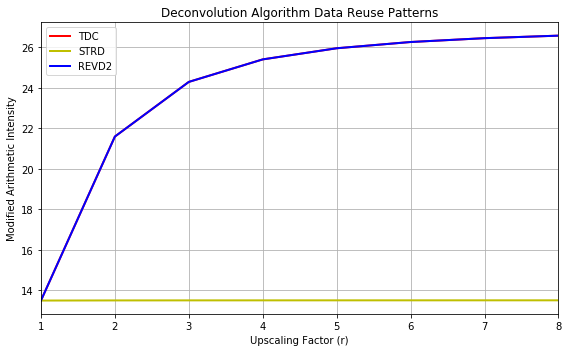

In [54]:
from upsampling.data_reuse import *

height = width = 1024
num_channels = 3
kernel_size = 3

# Using NVIDIA GTX 680 from Choi et al. (2013) - A Roofline Model of Energy
e_flop = 43.2  * 1e-12 # J / flop
e_mem = 437.5 * 1e-12 # J / byte
pi_0 = 66.37 # watts

t_flop = 1. / (1e9 * 3532.8) # s / flop
t_mem = 1. / (1e9 * 192.2) # s / byte

Bt = t_mem / t_flop
Be = e_mem / e_flop

data_reuse = np.zeros((3, 9)) # ops / byte

for upscaling_factor in np.arange(1, 9):
    
    macs, _, activations = reverse_looping_deconvolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size
    )
    data_reuse[0, upscaling_factor] = macs / activations
    
    true_macs = macs
    
    _, _, activations = fractionally_strided_deconvolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size
    )
    data_reuse[1, upscaling_factor] = macs / activations

    _, _, activations = transforming_deconvolution_to_convolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size
    )
    data_reuse[2, upscaling_factor] = macs / activations

x  = np.arange(1, 9)
    
plt.figure(figsize=(8,5))
plt.plot(x, data_reuse[2, 1:], label="TDC", color="r", linewidth=2)
plt.plot(x, data_reuse[1, 1:], label="STRD", color="y", linewidth=2)
plt.plot(x, data_reuse[0, 1:], label="REVD2", color="b", linewidth=2)
# plt.axhline(Be, linestyle="--", color="k")
# plt.axhline(Bt, linestyle="--", color="k")
plt.legend(loc="best")
plt.xlim(1,8)
plt.grid()
plt.xlabel("Upscaling Factor (r)")
plt.ylabel("Modified Arithmetic Intensity")
plt.title("Deconvolution Algorithm Data Reuse Patterns")
plt.tight_layout()
plt.show()

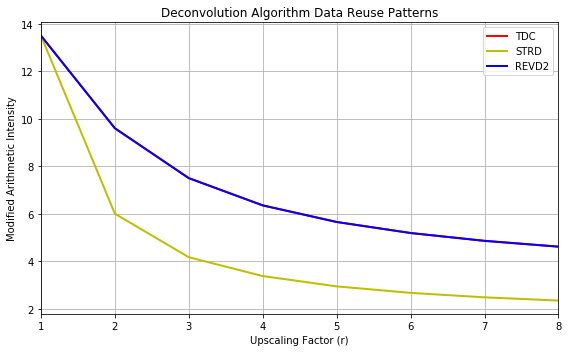

In [55]:
from upsampling.data_reuse import *

height = width = 1024
num_channels = 3
kernel_size = 3

# Using NVIDIA GTX 680 from Choi et al. (2013) - A Roofline Model of Energy
e_flop = 43.2  * 1e-12 # J / flop
e_mem = 437.5 * 1e-12 # J / byte
pi_0 = 66.37 # watts

t_flop = 1. / (1e9 * 3532.8) # s / flop
t_mem = 1. / (1e9 * 192.2) # s / byte

Bt = t_mem / t_flop
Be = e_mem / e_flop

data_reuse = np.zeros((3, 9)) # ops / byte

for upscaling_factor in np.arange(1, 9):
    
    macs, _, activations = reverse_looping_deconvolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator="D-NN"
    )
    data_reuse[0, upscaling_factor] = macs / activations
    
    true_macs = macs
    
    _, _, activations = fractionally_strided_deconvolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator="D-NN"
    )
    data_reuse[1, upscaling_factor] = macs / activations

    _, _, activations = transforming_deconvolution_to_convolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size,
        original_operator="D-NN"
    )
    data_reuse[2, upscaling_factor] = macs / activations

x  = np.arange(1, 9)
    
plt.figure(figsize=(8,5))
plt.plot(x, data_reuse[2, 1:], label="TDC", color="r", linewidth=2)
plt.plot(x, data_reuse[1, 1:], label="STRD", color="y", linewidth=2)
plt.plot(x, data_reuse[0, 1:], label="REVD2", color="b", linewidth=2)
# plt.axhline(Be, linestyle="--", color="k")
# plt.axhline(Bt, linestyle="--", color="k")
# plt.text(7, Be + 0.6, r"$B_\epsilon$", size=14)
# plt.text(7, Bt + 0.6, r"$B_\tau$", size=14)
plt.legend(loc="best")
plt.xlim(1,8)
# plt.ylim(0,20)
plt.grid()
plt.xlabel("Upscaling Factor (r)")
plt.ylabel("Modified Arithmetic Intensity")
plt.title("Deconvolution Algorithm Data Reuse Patterns")
plt.tight_layout()
plt.show()

comparing operators now that we know that we should be using the REVD algorithm

In [ ]:
from upsampling.data_reuse import *

height = width = 1024
num_channels = 3
kernel_size = 3

# Using NVIDIA GTX 680 from Choi et al. (2013) - A Roofline Model of Energy
e_flop = 43.2  * 1e-12 # J / flop
e_mem = 437.5 * 1e-12 # J / byte
pi_0 = 66.37 # watts

t_flop = 1. / (1e9 * 3532.8) # s / flop
t_mem = 1. / (1e9 * 192.2) # s / byte

latency_measurements = np.zeros((3, 9)) # microseconds
energy_consumption = np.zeros((3, 9)) # millijoules

for upscaling_factor in np.arange(1, 9):
    macs, weights, activations = reverse_looping_deconvolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size
    )
    T = max(macs * t_flop, (weights + activations) * t_mem)
    E = macs * e_flop + (weights + activations) * e_mem + pi_0 * T
    latency_measurements[0, upscaling_factor] = 1e6 * T # microseconds
    energy_consumption[0, upscaling_factor] = 1e3 * E # millijoules
    
    macs, weights, activations = fractionally_strided_deconvolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size
    )
    T = max(macs * t_flop, (weights + activations) * t_mem)
    E = macs * e_flop + (weights + activations) * e_mem + pi_0 * T
    latency_measurements[1, upscaling_factor] = 1e6 * T # microseconds
    energy_consumption[1, upscaling_factor] = 1e3 * E # millijoules

    macs, weights, activations = transforming_deconvolution_to_convolution_data_reuse_patterns(
        upscaling_factor,
        H=height,
        C=num_channels,
        K=kernel_size
    )
    T = max(macs * t_flop, (weights + activations) * t_mem)
    E = macs * e_flop + (weights + activations) * e_mem + pi_0 * T
    latency_measurements[2, upscaling_factor] = 1e6 * T # microseconds
    energy_consumption[2, upscaling_factor] = 1e3 * E # millijoules

x  = np.arange(1, 9)
Tb = latency_measurements[0,1]
Eb = energy_consumption[0,1]
    
plt.figure(figsize=(8,5))
plt.plot(x, latency_measurements[2, 1:] / Tb, label="TDC", color="r", linewidth=2)
plt.plot(x, latency_measurements[1, 1:] / Tb, label="STRD", color="y", linewidth=2)
plt.plot(x, latency_measurements[0, 1:] / Tb, label="REVD2", color="b", linewidth=2)
plt.legend(loc="best")
plt.yscale("log")
plt.ylim(1,)
plt.xlim(1,8)
plt.grid()
plt.xlabel("Upscaling Factor (r)")
plt.ylabel("Normalized Latency")
plt.title("Deconvolution Algorithm Latency Estimation")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(x, energy_consumption[2, 1:] / Eb, label="TDC", color="r", linewidth=2)
plt.plot(x, energy_consumption[1, 1:] / Eb, label="STRD", color="y", linewidth=2)
plt.plot(x, energy_consumption[0, 1:] / Eb, label="REVD2", color="b", linewidth=2)
plt.legend(loc="best")
plt.yscale("log")
plt.ylim(1,)
plt.xlim(1,8)
plt.grid()
plt.xlabel("Upscaling Factor (r)")
plt.ylabel("Energy Consumption")
plt.title("Idealized Deconvolution Algorithm Energy Consumption Estimation")
plt.tight_layout()
plt.show()